# Cargamos archivos y librerías

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.6f}'.format)

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.insert(loc=0, column='ones', value=1) 
df.head()

,ones,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,1,2,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,1,3,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,1,4,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,1,5,314,103,2,2.000000,3.000000,8.210000,0,0.650000


# Hacemos un shuffle de la data

In [3]:
newdf = df.sample(frac=1)
newdf

,ones,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
354,1,355,297,98,2,2.500000,3.000000,7.670000,0,0.590000
115,1,116,310,106,4,4.500000,4.500000,9.040000,1,0.660000
307,1,308,325,112,4,4.000000,4.000000,9.000000,1,0.800000
203,1,204,334,120,5,4.000000,5.000000,9.870000,1,0.970000
37,1,38,300,105,1,1.000000,2.000000,7.800000,0,0.580000
...,...,...,...,...,...,...,...,...,...,...
209,1,210,301,104,3,3.500000,4.000000,8.120000,1,0.680000
360,1,361,322,110,3,4.000000,5.000000,8.640000,1,0.850000
27,1,28,298,98,2,1.500000,2.500000,7.500000,1,0.440000
292,1,293,302,99,2,1.000000,2.000000,7.970000,0,0.560000


# Approach: Tomar en cuenta todas las columnas

In [4]:
arr = np.array(newdf)
arr

array([[  1.  , 355.  , 297.  , ...,   7.67,   0.  ,   0.59],
       [  1.  , 116.  , 310.  , ...,   9.04,   1.  ,   0.66],
       [  1.  , 308.  , 325.  , ...,   9.  ,   1.  ,   0.8 ],
       ...,
       [  1.  ,  28.  , 298.  , ...,   7.5 ,   1.  ,   0.44],
       [  1.  , 293.  , 302.  , ...,   7.97,   0.  ,   0.56],
       [  1.  , 400.  , 333.  , ...,   9.66,   1.  ,   0.95]])

# Partir el Array
Partimos el array en un training, validating (CV), y testing set.

In [5]:
train, validate, test = np.split(arr, [int(len(arr)*0.7), int(len(arr)*0.85)])

### Separamos las columnas "X" y "Y"

In [6]:
xtrain = train[:,0:9]
ytrain = train[:,9].reshape(len(xtrain),1)
xcv = validate[:,0:9]
ycv = validate[:,9].reshape(len(xcv),1)
xtest = test[:,0:9]
ytest = test[:,9].reshape(len(xtest),1)

# Funciones
Tenemos la función de costo, del gradiente lineal de costo y el gradiente final. Incorporamos también el parámetro lambda

In [7]:
def linear_function_cost(X, y, theta, lambdaparam):
    h = X @ theta
    lambdapart = (lambdaparam/(2*len(X))) * (theta**2).sum()
    return ((y - h) ** 2).sum() / (2 * len(X)) + lambdapart

def linear_gradient_cost(X, y, theta, lambdaparam):
    h = X @ theta
    lambdapart = lambdaparam*theta
    return (((h - y).T @ X).T + lambdaparam) / len(X)

def gradient_descent_cost(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, max_iter=1000, lambdaparam=10):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []
    while np.linalg.norm(linear_gradient(X, y, theta,lambdaparam)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - (learning_rate * linear_gradient(X, y, theta, lambdaparam))
        costs.append(linear_function(X, y, theta, lambdaparam))
        thetas.append(theta.copy())
    return theta, costs, thetas

Generamos un theta random para poder iniciar los procesos

Generamos un theta random para poder iniciar los procesos

In [8]:
m, n =  xtrain.shape
random_theta1 = np.random.rand(n,1)
random_theta1

array([[0.99592927],
       [0.20769231],
       [0.54361338],
       [0.66461203],
       [0.60623641],
       [0.65546036],
       [0.54017586],
       [0.41961076],
       [0.22451583]])

# Polinomio 1

In [9]:
theta_results1, costs1, thetas1 = gradient_descent_cost(xtrain, ytrain, random_theta1, linear_function_cost, linear_gradient_cost, lambdaparam=10)
theta_results1

array([[ 0.99383425],
       [-0.0764183 ],
       [-0.12460596],
       [ 0.43615779],
       [ 0.59918309],
       [ 0.64777072],
       [ 0.53258341],
       [ 0.40137044],
       [ 0.22328188]])

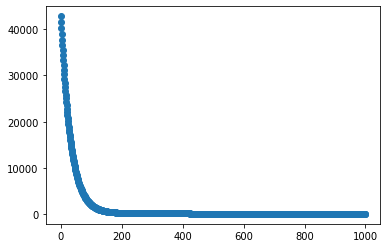

In [10]:
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs1)
plt.show()

In [11]:
costs1[-1]

49.679915785108

In [12]:
linear_function_cost(xcv,ycv,theta_results1,lambdaparam=10)

51.16454906648399

In [13]:
linear_function_cost(xtest,ytest,theta_results1, lambdaparam=10)

50.320639985791885

El modelo tiene un poco de variación entre los 3 sets (training, testing y el CV). Sin embargo, vemos que la función de costo casi llega a 0 lo cual es algo bueno. Analizaremos otros polinomios para ver si logramos mejorar el modelo

# Polinomio 2

In [14]:
pol2 = (xtrain[:,1]**2).reshape(len(xtrain),1)
xtrain2 = np.append(xtrain, pol2, axis=1)
pol2 = (xcv[:,1]**2).reshape(len(xcv),1)
xcv2 = np.append(xcv, pol2, axis=1)
pol2 = (xtest[:,1]**2).reshape(len(xtest),1)
xtest2 = np.append(xtest, pol2, axis=1)

In [15]:
m,n = xtrain.shape
random_theta2 = np.random.rand(n+1,1)
random_theta2

array([[0.50113656],
       [0.50798629],
       [0.2646112 ],
       [0.99971968],
       [0.63542071],
       [0.28336076],
       [0.85086866],
       [0.95618149],
       [0.80714092],
       [0.59626233]])

In [16]:
theta_results2, costs2, thetas2 = gradient_descent_cost(xtrain2, ytrain, random_theta2, linear_function_cost, linear_gradient_cost, learning_rate=0.00000000001, lambdaparam=10)
theta_results2

array([[ 0.50112922],
       [ 0.50601684],
       [ 0.26228704],
       [ 0.99893579],
       [ 0.63539913],
       [ 0.28333643],
       [ 0.85084376],
       [ 0.95611848],
       [ 0.80713706],
       [-0.00372124]])

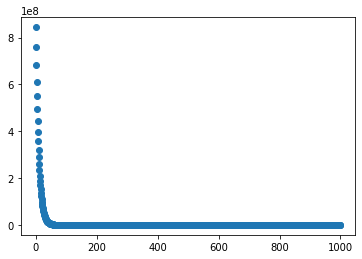

In [17]:
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs2)
plt.show()

In [18]:
costs2[-1]

12998.715414664128

In [19]:
theta_results2, costs2, thetas2 = gradient_descent_cost(xtrain2, ytrain, random_theta2, linear_function_cost, linear_gradient_cost, learning_rate=0.00000000001, lambdaparam=-40)
costs2[-1]

12998.327348707135

In [20]:
linear_function_cost(xcv2,ycv,theta_results2,lambdaparam=10)

13891.923824622227

In [21]:
linear_function_cost(xtest2,ytest,theta_results2, lambdaparam=10)

15061.790456574932

Vemos que los costos incrementaron bastante, no haría sentido modificar el parámetro lambda ya que solamente aumentando el *k* vemos que los costos suben. Vamos a probar como última instancia con un polinomio de grado 3 para ver si mejora.

# Polinomio 3

In [22]:
pol3 = (xtrain[:,1]**3).reshape(len(xtrain),1)
xtrain3 = np.append(xtrain2, pol3, axis=1)
pol3 = (xcv[:,1]**3).reshape(len(xcv),1)
xcv3 = np.append(xcv2, pol3, axis=1)
pol3 = (xtest[:,1]**3).reshape(len(xtest),1)
xtest3 = np.append(xcv2, pol3, axis=1)

In [23]:
xtrain3.shape

(280, 11)

In [24]:
m, n = xtrain3.shape
random_theta3 = np.random.rand(n,1)
random_theta3

array([[0.94482014],
       [0.97320642],
       [0.32484519],
       [0.80882039],
       [0.30756511],
       [0.07803799],
       [0.76680551],
       [0.15699352],
       [0.83706712],
       [0.77675978],
       [0.32126706]])

In [25]:
theta_results3, costs3, thetas3 = gradient_descent_cost(xtrain3, ytrain, random_theta3, linear_function_cost, linear_gradient_cost, learning_rate=0.000000000000001)
theta_results3

array([[ 0.94482012],
       [ 0.97320269],
       [ 0.32484066],
       [ 0.80881886],
       [ 0.30756507],
       [ 0.07803794],
       [ 0.76680546],
       [ 0.1569934 ],
       [ 0.83706711],
       [ 0.77569509],
       [-0.00229224]])

In [26]:
costs3[-1]

45304774.51647213

In [27]:
linear_function_cost(xcv3,ycv,theta_results3,lambdaparam=10)

37195849.8360814

In [28]:
linear_function_cost(xtest3,ytest,theta_results3, lambdaparam=10)

1911905065.0488842

Concluimos que incrementar el polinomio no mejora el modelo. Además, existe mucha varianza en los costos de los 3 sets. Al final lo que queremos es un modelo que no tenga costos altos, como también que pueda ajustarse bien a los 3 sets, y cualquier set de datos aleatorios que procese en el futuro.

# Polinomio 1 Ajustando Lambda

In [32]:
print(f"Costo antes de modificar lambda {costs1[-1]}")

Costo antes de modificar lambda 49.679915785108


In [38]:
theta_results_lambda, costs_lambda, thetas_lambda = gradient_descent_cost(xtrain, ytrain, random_theta1, linear_function_cost, linear_gradient_cost, lambdaparam=-100)
costs_lambda[-1]

49.19255365654365

### Diferencia entre dejar lambda en 10, y modificarlo a -100

In [39]:
costs1[-1] - costs_lambda[-1]

0.48736212856434946

# Conclusiones
Logramos mejorar la función de costos pero en una magnitud casi insignificativa. La función ya llegó a su punto óptimo, podríamos seguir reduciendo el valor poniendo valores de lambda negativos más grandes pero ya no resulta lógico. Anteriormente demostramos que incrementando el grado *k* de la función simplemente volvía peor el modelo, teniendo costos más altos. Por lo mismo nos decidimos quedar con el grado *k* 1, pero tratamos de reducir un poco más el costo modificando el parámetro de *lambda*. Recordemos que si el modelo tiene mucho bias, se reduce lambda. Mientras que si tiene mucha variación, se aumenta lambda. En nuestro caso, el modelo previamente a modificarle lambda ya se encontraba bastante óptimo. No tenía problemas de variance ni bias, se ajustaba bastante bien entre los 3 sets. Por motivos de ejemplificar, reducimos lambda considerando que tenía "bias". El nivel de mejora es sumamente pequeño, de tan solo 0.48. 